# Data format and SED data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

## data format


The SED data are internally stored as astropy tables, but it is very easy to import from

 1. ascii files
 2. numpy array in general
 
once that is clear the data format. The easiest way to understand the data format is to build an empty table to have a look at the structure of the table:

In [2]:
from jetset.data_loader import Data
data=Data(n_rows=10)

we can easily access the astropy table

In [3]:
data.table

x,dx,y,dy,T_start,T_stop,UL,data_set
Hz,erg / (cm2 s),Hz,erg / (cm2 s),MJD,MJD,,
float64,float64,float64,float64,float64,float64,bool,bytes16
0.0,0.0,0.0,0.0,0.0,0.0,False,0.0
0.0,0.0,0.0,0.0,0.0,0.0,False,0.0
0.0,0.0,0.0,0.0,0.0,0.0,False,0.0
0.0,0.0,0.0,0.0,0.0,0.0,False,0.0
0.0,0.0,0.0,0.0,0.0,0.0,False,0.0
0.0,0.0,0.0,0.0,0.0,0.0,False,0.0
0.0,0.0,0.0,0.0,0.0,0.0,False,0.0
0.0,0.0,0.0,0.0,0.0,0.0,False,0.0


- ``x`` column is reserved to frequencies (mandatory)
- ``y`` columm is reserved to fluxes  (mandatory)
- ``dx`` columm is reserved to the error on the frequency,or bin width
- ``dy`` columm is reserved to the  error on the fluxes
- ``UL`` columm is reserved to the flag for Upper Limit 
- ``T_start`` and ``T_stop`` are used to identify the time range to select data using the  class `ObsData`
- ``data_set``

and we can easily access the metadata

In [4]:
data.metadata

OrderedDict([('z', 0),
             ('UL_CL', 0.95),
             ('restframe', 'obs'),
             ('data_scale', 'lin-lin'),
             ('obj_name', 'new-src')])

- ``z``: the redshift of the object
- ``UL_CL``: the CL for the UL
- ``restframe``:  possible values``obs`` or ``src``, indicating if the data are observed flux, or luminosities, respectively
- ``data_scale``: possible values``lin-lin`` or ``log-log``,  indicating if the data are in linear or logarithmic scale, respectively
- ``obj_name``: the name of the object


**we remind that the conversion from ``src`` to ``obs`` will be exposed in the next release, for the time being, please use only fluxes and not luminosities**

## loading from astropy table


In [5]:
from jetset.test_data_helper import  test_SEDs
test_SEDs

['/Users/orion/anaconda3/lib/python3.7/site-packages/jetset-1.0.2-py3.7-macosx-10.7-x86_64.egg/jetset/test_data/SEDs_data/SED_3C345.dat',
 '/Users/orion/anaconda3/lib/python3.7/site-packages/jetset-1.0.2-py3.7-macosx-10.7-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk421.dat',
 '/Users/orion/anaconda3/lib/python3.7/site-packages/jetset-1.0.2-py3.7-macosx-10.7-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk501.dat']

In [6]:
from jetset.data_loader import Data

In [7]:
data=Data(data_table=test_SEDs[1])

In [8]:
data.table

x,dx,y,dy,T_start,T_stop,UL,data_set
Hz,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),MJD,MJD,,
float64,float64,float64,float64,float64,float64,bool,str13
2299540000.0,0.0,1.3409e-14,3.91e-16,0.0,0.0,False,campaing-2009
2639697000.0,0.0,1.793088e-14,3.231099e-26,0.0,0.0,False,campaing-2009
4799040000.0,0.0,2.3136e-14,2.4e-16,0.0,0.0,False,campaing-2009
4805039000.0,0.0,1.773414e-14,1.773414e-15,0.0,0.0,False,campaing-2009
4843552000.0,0.0,2.77614e-14,2.615339e-26,0.0,0.0,False,campaing-2009
7698460000.0,0.0,3.696e-14,4.62e-16,0.0,0.0,False,campaing-2009
8267346000.0,0.0,2.836267e-14,2.836267e-15,0.0,0.0,False,campaing-2009
8331867000.0,0.0,3.98963e-14,3.627671e-26,0.0,0.0,False,campaing-2009


In [9]:
data.metadata

OrderedDict([('z', 0.0308),
             ('restframe', 'obs'),
             ('data_scale', 'lin-lin'),
             ('obj_name', 'J1104+3812,Mrk421')])

```
# %ECSV 0.9
# ---
# datatype:
# - {name: x, unit: Hz, datatype: float64}
# - {name: y, unit: erg/(cm2 s) , datatype: float64}
# - {name: dy, unit: erg/(cm2 s) ,datatype: float64}
# - {name: data_set, datatype: string}
# meta: !!omap
# - {z: 0.0308 }
# - {restframe: obs}
# - {data_scale: lin-lin}
# - {obj_name: 'J1104+3812,Mrk421'}
# schema: astropy-2.0
x y dy data_set
2.299540e+09 1.340900e-14 3.910000e-16    campaing-2009
2.639697e+09 1.793088e-14 3.231099e-26	  campaing-2009
4.799040e+09 2.313600e-14 2.400000e-16    campaing-2009
```


## saving to a file


## importing data from an arbitrary ascii file or numpy array


Assume that your data are stored in an ASCII file named 'test-ascii.txt', with
- ``x`` in the first column with frequency in ``Hz`` , 
- ``y`` in the second column with fluxes in erg ``cm-2 s-1``, 
- ``dy`` in the third column with the same units as ``y``
- the data are  in ``log-log`` scale

**of course the column number depends on the file that you are using, this is only an example**

In [10]:
from jetset.data_loader import Data
import numpy as np

d=np.genfromtxt('test-ascii.txt')
data=Data(n_rows=d.shape[0])
data.set_field('x',d[:,0])
data.set_field('y',d[:,1])
data.set_field('dy',value=d[:,2])

then you can set the meatdata as follows

In [11]:
data.set_meta_data('z',1.02)
data.set_meta_data('restframe','obs')
data.set_meta_data('data_scale','log-log')


of course this method applies if you have a generic 2-dim numpy array.

## importing data from the asi ssdc sedtool


To import data from a data file downloaded from the asi ssdc sedtool: https://tools.ssdc.asi.it/SED/  

In [12]:
from jetset.data_loader import Data
data=Data.from_asdc(asdc_sed_file='MRK421_asdc.txt',obj_name='Mrk421',restframe='obs',data_scale='lin-lin',z=0.038)


**we remind that the conversion from ``src`` to ``obs`` will be exposed in the next release, for the time being, please use only fluxes and not luminosities**

## Building the SED


We start to loading  the SED of  Mrk 421, and we pass to ``ObsData`` directly the path to the file, because this is already in the format that we need and that we have discussed above.

In [13]:
from jetset.data_loader import Data
from jetset.data_loader import ObsData
from jetset.test_data_helper import  test_SEDs

data_table=Data(data_table=test_SEDs[1])
sed_data=ObsData(data_table=data_table)

As you can see the all the meta-data have been properly sourced from the SED file header. You also get information on 
the length of the data, before and after elimination of duplicated entries, and upper limits
These meta-data are parameters needed by the 

In [14]:
sed_data.table

nu_data,dnu_data,nuFnu_data,dnuFnu_data,nu_data_log,dnu_data_log,nuFnu_data_log,dnuFnu_data_log,dnuFnu_facke,dnuFnu_facke_log,UL,zero_error,T_start,T_stop,data_set
Hz,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),Hz,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),,,,MJD,MJD,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool,float64,float64,str13
2299540000.0,0.0,1.3409e-14,3.91e-16,9.361640968434164,0.0,-13.872603609223393,0.012663818511758627,2.6818000000000003e-15,0.2,False,False,0.0,0.0,campaing-2009
2639697000.0,0.0,1.793088e-14,3.231099e-26,9.421554078847052,0.0,-13.746398395894273,7.825876176646739e-13,3.586176e-15,0.2,False,False,0.0,0.0,campaing-2009
4799040000.0,0.0,2.3136e-14,2.4e-16,9.681154369792159,0.0,-13.635711724385564,0.0045051294803241885,4.627200000000001e-15,0.2,False,False,0.0,0.0,campaing-2009
4805039000.0,0.0,1.773414e-14,1.773414e-15,9.68169691696108,0.0,-13.751189867373059,0.04342944819032518,3.546828e-15,0.2,False,False,0.0,0.0,campaing-2009
4843552000.0,0.0,2.77614e-14,2.615339e-26,9.68516396664987,0.0,-13.556558636309997,4.091390549490907e-13,5.55228e-15,0.2,False,False,0.0,0.0,campaing-2009
7698460000.0,0.0,3.696e-14,4.62e-16,9.886403857589054,0.0,-13.43226803745193,0.005428681023790648,7.392e-15,0.2,False,False,0.0,0.0,campaing-2009
8267346000.0,0.0,2.836267e-14,2.836267e-15,9.917366113839973,0.0,-13.547252888027566,0.043429448190325175,5.672534000000001e-15,0.2,False,False,0.0,0.0,campaing-2009
8331867000.0,0.0,3.98963e-14,3.627671e-26,9.920742328771254,0.0,-13.399067379102538,3.948931348171262e-13,7.97926e-15,0.2,False,False,0.0,0.0,campaing-2009


In [15]:
sed_data.metadata

z :  0.0308
obj_name :  J1104+3812,Mrk421
restframe :  obs
data_scale :  lin-lin
UL_CL :  0.95


## Plotting data


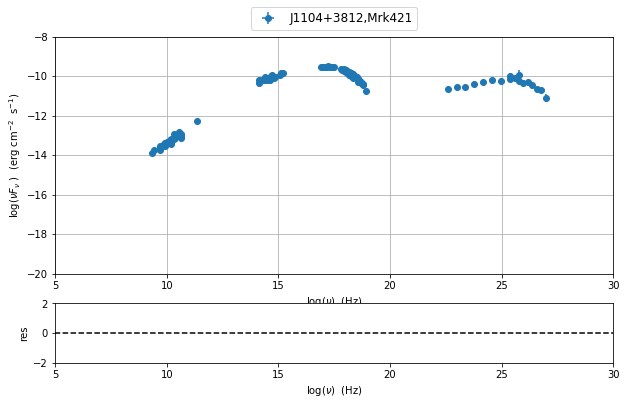

In [16]:
from jetset.plot_sedfit import PlotSED
myPlot=PlotSED(sed_data)

or you can create the object to plot on the fly in this way

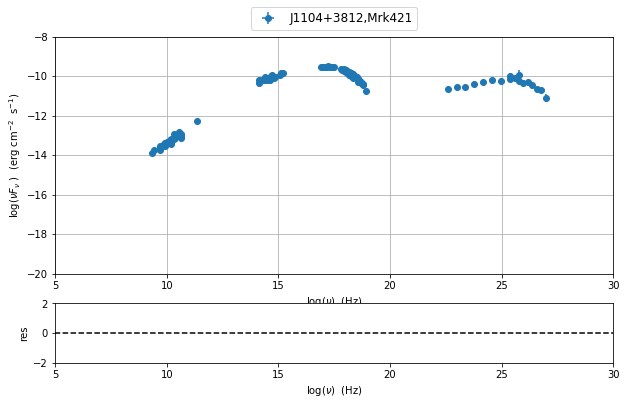

In [17]:
myPlot=sed_data.plot_sed()


you can rescale your plot

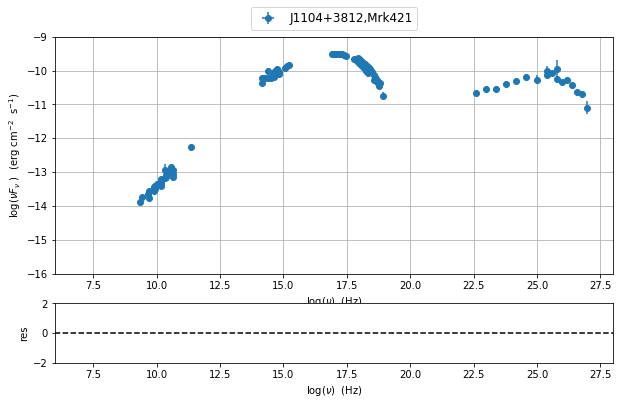

In [18]:
myPlot=sed_data.plot_sed()
myPlot.rescale(x_min=6,x_max=28,y_min=-16,y_max=-9)

**to have interactive plot in jupyter**

<IPython.core.display.Javascript object>


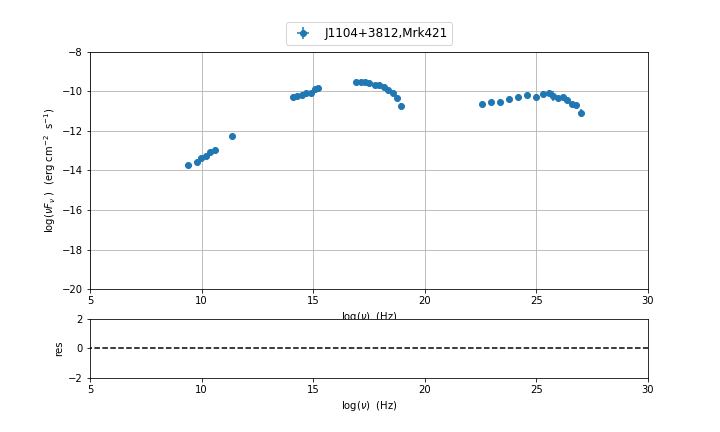

In [24]:
%matplotlib notebook
myPlot=sed_data.plot_sed()

**to have interactive plot in ipython**

<IPython.core.display.Javascript object>


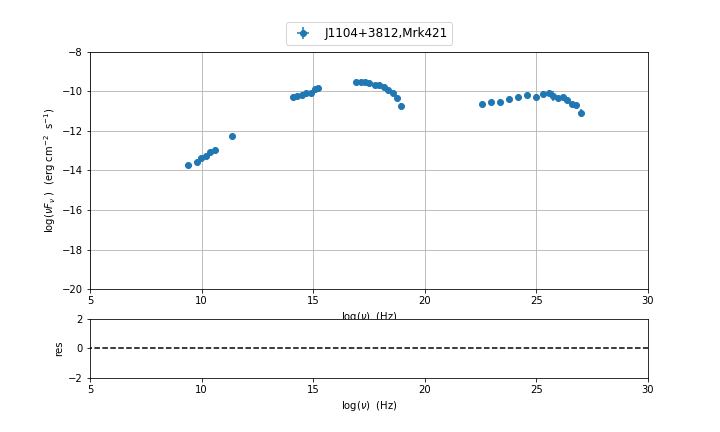

In [25]:
from matplotlib import pylab as plt
plt.ion()
myPlot=sed_data.plot_sed()

## grouping data

As you can see, due to the overlapping of different instruments and to different time snapshots, 
some points have multiple values. Although this is not a problem for the fit process, you might 
want to rebin (group) your data. This can be obtained with the following command:

In [21]:
sed_data.group_data(bin_width=0.2)


***  binning data  ***
---> N bins= 89
---> bin_widht= 0.2




## handling errors and systematics

Another important issues when dealing with fitting of data, is the proper handling of errors.
Typically one might need to add systematics for different reasons:
 
 - data are not really simultaneous, and you want to add systematics to take this into account
 - data (typically IR up to UV), might have very small errors compared to those at higher energies.
   This might bias the minimizer to accommodate the parameters  in order to fit 'better' the low
   frequencies branch.
  
For these reasons the package offer the possibility to add systematics 
  
  

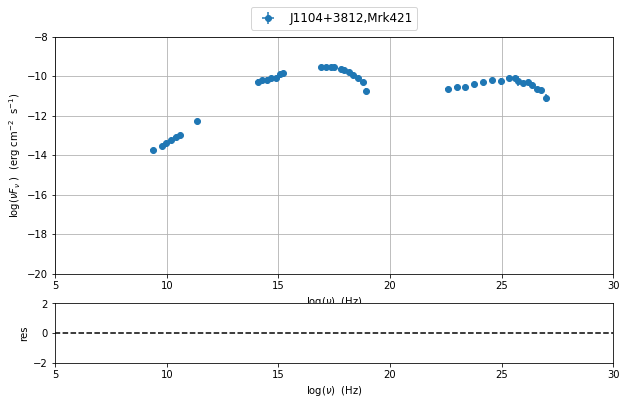

In [22]:
%matplotlib inline
sed_data.add_systematics(0.2,[10.**6,10.**29])
myPlot=sed_data.plot_sed()